In [34]:
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [13]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [14]:
url = 'https://nces.ed.gov/programs/digest/d16/tables/dt16_602.20.asp'
browser.visit(url)
html = browser.html

In [5]:
table = pd.read_html(url)[3]
table.columns=['Country or other education system','Total instructional hours per year','2','[Standard errors appear in parentheses]', 'Average Math score','Mathematics','Science','Instructional time in mathematics', 'Hours per year','Instructional time in science','As a percent of total instructional hours','Hours per year','Average Science score','As a percent of total instructional hours','1','3','4','5','6','7']
table.set_index('Country or other education system', inplace=True)
table.head()

,Total instructional hours per year,2,[Standard errors appear in parentheses],Average Math score,Mathematics,Science,Instructional time in mathematics,Hours per year,Instructional time in science,As a percent of total instructional hours,Hours per year,Average Science score,As a percent of total instructional hours,1,3,4,5,6,7
Country or other education system,,,,,,,,,,,,,,,,,,,
International average3,888.0,NaN,(2.0),500.0,NaN,(†),155,NaN,(0.5),17,(0.1),500,NaN,(†),76,NaN,(0.4),9,(#)
Australia,1014.0,4.0,(8.4),517.0,NaN,(3.1),202,4.0,(3.5),20,(0.4),524,NaN,(2.9),57,4.0,(1.5),6,(0.2)
Bahrain5,976.0,NaN,(0.6),451.0,NaN,(1.6),159,4.0,(2.9),16,(0.3),459,NaN,(2.6),103,4.0,(0.6),11,(0.1)
Belgium (Flemish)6,955.0,4.0,(11.6),546.0,NaN,(2.1),218,4.0,(3.2),23,(0.4),512,NaN,(2.3),—,NaN,(†),—,(†)
Bulgaria,707.0,4.0,(27.3),524.0,NaN,(5.3),105,NaN,(2.9),15,(0.7),536,NaN,(5.9),42,NaN,(2.3),6,(0.4)


In [7]:
new_table=table.drop(columns=["2", "Instructional time in mathematics",'Total instructional hours per year','[Standard errors appear in parentheses]', 'Mathematics','Science','Hours per year','Instructional time in science','As a percent of total instructional hours','Hours per year','As a percent of total instructional hours','1','3','4','5','6','7'])
new_table

,Average Math score,Average Science score
Country or other education system,,
International average3,500.0,500
Australia,517.0,524
Bahrain5,451.0,459
Belgium (Flemish)6,546.0,512
Bulgaria,524.0,536
...,...,...
Buenos Aires (Argentina),432.0,418
Dubai (United Arab Emirates),511.0,518
Florida14 (United States),546.0,549


In [8]:
csv_data=new_table.to_csv
csv_data('csv_data.csv')

In [24]:
scores_df=pd.read_csv('Resources/int_data.csv')
scores_df.head()

,Country or other education system,Average Math score,Average Science score
0,International average3,500.0,500.0
1,Australia,517.0,524.0
2,Bahrain5,451.0,459.0
3,Belgium (Flemish)6,546.0,512.0
4,Bulgaria,524.0,536.0


<IPython.core.display.Javascript object>


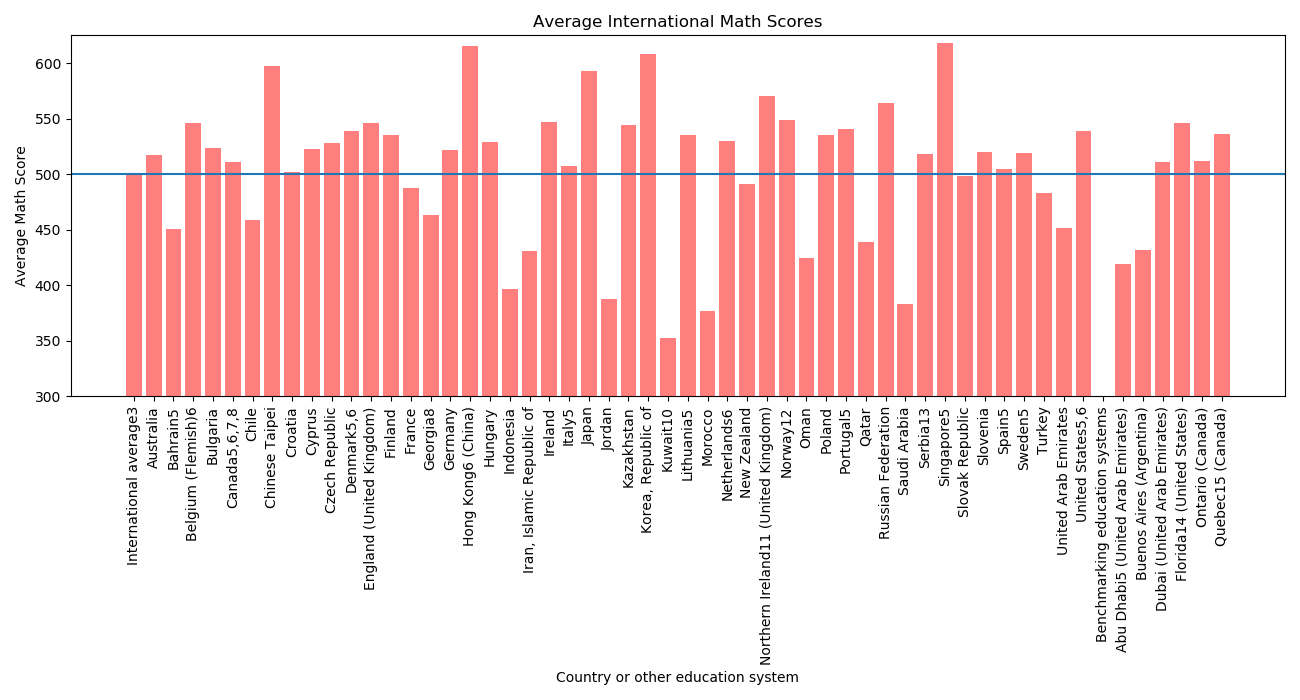

In [41]:
# Create a list indicating where to write x labels and set figure size to adjust for space
# Set x axis and tick locations
x_axis = np.arange(len(scores_df))
tick_locations = [value+0.4 for value in x_axis]
a=plt.figure(figsize=(13,7))
plt.bar(x_axis, scores_df["Average Math score"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, scores_df["Country or other education system"], rotation="90")
plt.ylim([300,625])
plt.title("Average International Math Scores")
plt.ylabel("Average Math Score")
plt.xlabel("Country or other education system")
plt.axhline(y=500)
plt.savefig("Math_int_scores.png")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


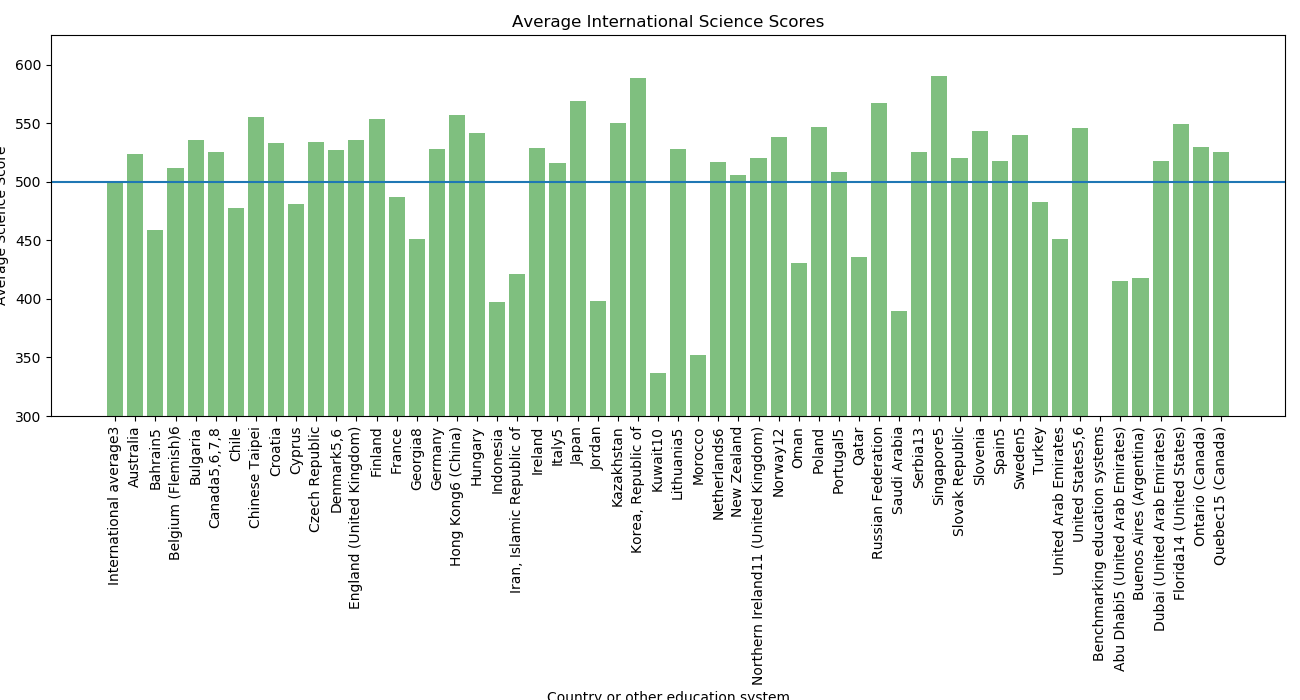

In [42]:
x_axis = np.arange(len(scores_df))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
a=plt.figure(figsize=(13,7))
plt.bar(x_axis, scores_df["Average Science score"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, scores_df["Country or other education system"], rotation="vertical")
plt.title("Average International Science Scores")
plt.tight_layout()
plt.ylim([300,625])
plt.axhline(y=500)
plt.ylabel("Average Science Score")
plt.xlabel("Country or other education system")
plt.savefig("Science_int_scores.png")
plt.show()